# Examination of Digital Community Conversations Within Specific Disease States Via Reddit

- **Vision**: Development of a repeatable process for the analysis of Reddit conversations
within specific condition and/or disease state with applicable threads and subreddit
threads (subreddits) to potentially inform strategy and content development. Create a
simplified and repeatable process that does not require the users to be fluent in Reddit.
- **Issue**: While Reddit offers robust, open, and community-minded discussions surrounding
conditions and disease states, Reddit also provides volumes of unstructured and
unclassified data. The development of a repeatable process – that continues to monitor
evolving conversations over time – currently requires multiple tools (ex. – tools to scrape
threads, tools to analyze keyword content, tools to analyze sentiment, etc.).
- **Method**: After identifying priority conditions and/or disease states with active Reddit
communities (ex. – prostate cancer, breast cancer, HIV, etc.), build relational taxonomy
(ex. – medicine, treatment, and adherence all have specific topics but have relational
discussions) of topical themes addressed within.
- **Potential Output**: Provide use case for healthcare companies on the importance of
Reddit as an early source of social indicator of trends and conversational “lexicon” to be
used for patient communications and programs.

# <font color='Green'><center>Mileston 1: Research and Dataset</font>

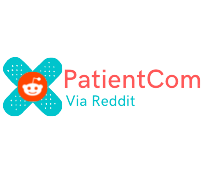

In [1]:
from IPython.display import Image
Image(filename='img/logo.png')

# I - DataSet: Integrating the Reddit APP: PatientCom

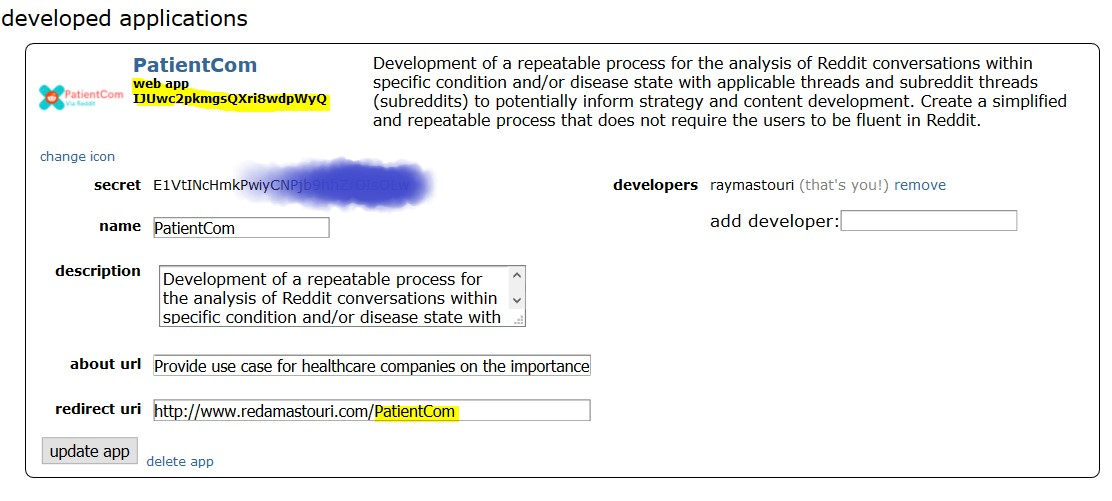

In [2]:
Image(filename='img/app.jpg')

In [3]:
'''
Needed librairies
'''
import requests
import pandas as pd
import numpy as np

'''
Data analysis and Wrangling
'''
import pandas as pd
import numpy as np
import random as rnd
from datetime import date, datetime, time, timedelta
import datetime as dt

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.ticker as mtic
import matplotlib.pyplot as plot
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
#Final DF
# https://towardsdatascience.com/how-to-use-the-reddit-api-in-python-5e05ddfd1e5c
import requests
import pandas as pd
from datetime import datetime



# we use this function to convert responses to dataframes
def df_from_response(res):
    # initialize temp dataframe for batch of data in response
    df = pd.DataFrame()

    # loop through each post pulled from res and append to df
    for post in res.json()['data']['children']:
        df = df.append({
            'subreddit': post['data']['subreddit'],
            'title': post['data']['title'],
            'selftext': post['data']['selftext'],
            'upvote_ratio': post['data']['upvote_ratio'],
            'ups': post['data']['ups'],
            'downs': post['data']['downs'],
            'score': post['data']['score'],
            'link_flair_css_class': post['data']['link_flair_css_class'],
            'created_utc': datetime.fromtimestamp(post['data']['created_utc']).strftime('%Y-%m-%dT%H:%M:%SZ'),
            'id': post['data']['id'],
            'kind': post['kind'], 
            'approved_at_utc': post['data']['approved_at_utc'],
            'subreddit': post['data']['subreddit'],
            'selftext': post['data']['selftext'],
            'saved': post['data']['saved'],
            'mod_reason_title': post['data']['mod_reason_title'],
            'gilded': post['data']['gilded'],
            'clicked': post['data']['clicked'],
            'title': post['data']['title'],
            'link_flair_richtext': post['data']['link_flair_richtext'],
            'subreddit_name_prefixed': post['data']['subreddit_name_prefixed'],
            'hidden': post['data']['hidden'],
            'pwls': post['data']['pwls'],
            'link_flair_css_class': post['data']['link_flair_css_class'],
            'downs': post['data']['downs'],
            'top_awarded_type': post['data']['top_awarded_type'],
            'hide_score': post['data']['hide_score'],
            'name': post['data']['name'],
            'quarantine': post['data']['quarantine'],
            'link_flair_text_color': post['data']['link_flair_text_color'],
            'upvote_ratio': post['data']['upvote_ratio'],
            'author_flair_background_color': post['data']['author_flair_background_color'],
            'subreddit_type': post['data']['subreddit_type'],
            'ups': post['data']['ups'],
            'total_awards_received': post['data']['total_awards_received'],
            'media_embed': post['data']['media_embed'],
            'author_flair_template_id': post['data']['author_flair_template_id'],
            'is_original_content': post['data']['is_original_content'],
            'user_reports': post['data']['user_reports'],
            'secure_media': post['data']['secure_media'],
            'is_reddit_media_domain': post['data']['is_reddit_media_domain'],
            'is_meta': post['data']['is_meta'],
            'category': post['data']['category'],
            'secure_media_embed': post['data']['secure_media_embed'],
            'link_flair_text': post['data']['link_flair_text'],
            'can_mod_post': post['data']['can_mod_post'],
            'score': post['data']['score'],
            'approved_by': post['data']['approved_by'],
            'thumbnail': post['data']['thumbnail'],
            'edited': post['data']['edited'],
            'author_flair_css_class': post['data']['author_flair_css_class'],
            'gildings': post['data']['gildings'],
            'content_categories': post['data']['content_categories'],
            'is_self': post['data']['is_self'],
            'mod_note': post['data']['mod_note'],
            'created': post['data']['created'],
            'link_flair_type': post['data']['link_flair_type'],
            'wls': post['data']['wls'],
            'removed_by_category': post['data']['removed_by_category'],
            'banned_by': post['data']['banned_by'],
            'domain': post['data']['domain'],
            'allow_live_comments': post['data']['allow_live_comments'],
            'selftext_html': post['data']['selftext_html'],
            'likes': post['data']['likes'],
            'suggested_sort': post['data']['suggested_sort'],
            'banned_at_utc': post['data']['banned_at_utc'],
            'view_count': post['data']['view_count'],
            'archived': post['data']['archived'],
            'no_follow': post['data']['no_follow'],
            'is_crosspostable': post['data']['is_crosspostable'],
            'pinned': post['data']['pinned'],
            'over_18': post['data']['over_18'],
            'all_awardings': post['data']['all_awardings'],
            'awarders': post['data']['awarders'],
            'media_only': post['data']['media_only'],
            'can_gild': post['data']['can_gild'],
            'spoiler': post['data']['spoiler'],
            'locked': post['data']['locked'],
            'author_flair_text': post['data']['author_flair_text'],
            'treatment_tags': post['data']['treatment_tags'],
            'visited': post['data']['visited'],
            'removed_by': post['data']['removed_by'],
            'num_reports': post['data']['num_reports'],
            'distinguished': post['data']['distinguished'],
            'subreddit_id': post['data']['subreddit_id'],
            'mod_reason_by': post['data']['mod_reason_by'],
            'removal_reason': post['data']['removal_reason'],
            'link_flair_background_color': post['data']['link_flair_background_color'],
            'id': post['data']['id'],
            'is_robot_indexable': post['data']['is_robot_indexable'],
            'report_reasons': post['data']['report_reasons'],
            'author': post['data']['author'],
            'discussion_type': post['data']['discussion_type'],
            'num_comments': post['data']['num_comments'],
            'send_replies': post['data']['send_replies'],
            'whitelist_status': post['data']['whitelist_status'],
            'contest_mode': post['data']['contest_mode'],
            'mod_reports': post['data']['mod_reports'],
            'author_flair_text_color': post['data']['author_flair_text_color'],
            'permalink': post['data']['permalink'],
            'parent_whitelist_status': post['data']['parent_whitelist_status'],
            'stickied': post['data']['stickied'],
            'url': post['data']['url'],
            'subreddit_subscribers': post['data']['subreddit_subscribers'],
            'created_utc': post['data']['created_utc'],
            'num_crossposts': post['data']['num_crossposts'],
            'media': post['data']['media'],
            'is_video': post['data']['is_video']
        }, ignore_index=True)

    return df

In [5]:
# authenticate API
# note that CLIENT_ID refers to 'personal use script' and SECRET_TOKEN to 'token'
client_auth = requests.auth.HTTPBasicAuth('5PtLw2OXKn8K-lTmDq8WaA', 'jxi9Ob2bO6axkXP_eKKQH4tFO5t9Rg')

# here we pass our login method (password), username, and password
disease = {'grant_type': 'password',
        'username': 'raymastouri',
        'password': 'M@$t0ur1198700rq'}

# setup our header info, which gives reddit a brief description of our app
headers = {'User-Agent': 'PatientCom/0.0.1'}

# send our request for an OAuth token
res = requests.post('https://www.reddit.com/api/v1/access_token',
                    auth=client_auth, data=disease, headers=headers)

# convert response to JSON and pull access_token value
token = res.json()['access_token']

# add authorization to our headers dictionary
headers = {**headers, **{'Authorization': f"bearer {token}"}}

# while the token is valid (~2 hours) we just add headers=headers to our requests
requests.get('https://oauth.reddit.com/api/v1/me', headers=headers)

<Response [200]>

In [6]:
# initialize dataframe and parameters for pulling data in loop
disease = pd.DataFrame()
params = {'limit': 100}

In [7]:
# loop through 10 times (returning 1K posts)
for i in range(3):
    # make request
    res = requests.get("https://oauth.reddit.com/r/disease/new",
                       headers=headers,
                       params=params)

    # get dataframe from response
    new_df = df_from_response(res)
    # take the final row (oldest entry)
    row = new_df.iloc[len(new_df)-1]
    # create fullname
    fullname = row['kind'] + '_' + row['id']
    # add/update fullname in params
    params['after'] = fullname
    
    # append new_df to data
    disease = disease.append(new_df, ignore_index=True)

In [8]:
disease.head()

,subreddit,title,selftext,upvote_ratio,ups,downs,score,link_flair_css_class,created_utc,id,...,mod_reports,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,num_crossposts,media,is_video
0,disease,Global Handwashing day,,1.00,3.0,0.0,3.0,vid,1.633912e+09,q5kcbc,...,[],None,/r/disease/comments/q5kcbc/global_handwashing_...,all_ads,0.0,https://youtu.be/IfusdJ-169E,2396.0,0.0,"{'type': 'youtube.com', 'oembed': {'provider_u...",0.0
1,disease,We're living through two of the ten deadliest ...,,1.00,1.0,0.0,1.0,vid,1.633776e+09,q4itxd,...,[],None,/r/disease/comments/q4itxd/were_living_through...,all_ads,False,https://www.youtube.com/watch?v=wIMzczjjYuc,2396.0,0.0,"{'type': 'youtube.com', 'oembed': {'provider_u...",False
2,disease,"Brazil Passes 600,000 COVID Deaths, Second Onl...",,0.91,8.0,0.0,8.0,media,1.633733e+09,q48k4h,...,[],dark,/r/disease/comments/q48k4h/brazil_passes_60000...,all_ads,False,https://www.voanews.com/a/brazil-passes-600-00...,2396.0,1.0,None,False
3,disease,New Ebola Case Confirmed in Eastern DR Congo,,1.00,2.0,0.0,2.0,media,1.633732e+09,q48h8j,...,[],dark,/r/disease/comments/q48h8j/new_ebola_case_conf...,all_ads,False,https://www.voanews.com/a/new-ebola-case-confi...,2396.0,1.0,None,False
4,disease,COVID-19 Deaths Hit New Daily Record As Romani...,,1.00,3.0,0.0,3.0,media,1.633732e+09,q48a03,...,[],dark,/r/disease/comments/q48a03/covid19_deaths_hit_...,all_ads,False,https://www.rferl.org/a/romania-covid-record-f...,2396.0,1.0,None,False


# <font color='Green'><center>Merging Raw Data for Subreddits</font>

### What are the subreddits we have chosen?

- disease
- futurology
- health
- gravesdisease
- Addisonsdisease
- medecine
- fatlogic
- ChronicPain
- Epidemiology
- cancer
- coronavisus
- covid19
- prostatecancer

In [9]:
'''
Health
'''
# initialize dataframe and parameters for pulling data in loop
Health = pd.DataFrame()
params = {'limit': 100}

# loop through 10 times (returning 1K posts)
for i in range(3):
    # make request
    res = requests.get("https://oauth.reddit.com/r/Health/new",
                       headers=headers,
                       params=params)

    # get dataframe from response
    new_df2 = df_from_response(res)
    # take the final row (oldest entry)
    row = new_df2.iloc[len(new_df2)-1]
    # create fullname
    fullname = row['kind'] + '_' + row['id']
    # add/update fullname in params
    params['after'] = fullname
    
    # append new_df to data
    Health = Health.append(new_df2, ignore_index=True)
Health.head()

,subreddit,title,selftext,upvote_ratio,ups,downs,score,link_flair_css_class,created_utc,id,...,mod_reports,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,num_crossposts,media,is_video
0,Health,Covid: UK start to pandemic worst public healt...,,1.00,2.0,0.0,2.0,None,1.634016e+09,q6etv3,...,[],None,/r/Health/comments/q6etv3/covid_uk_start_to_pa...,all_ads,0.0,https://www.bbc.co.uk/news/health-58876089,1352026.0,0.0,None,0.0
1,Health,Experts Call for Sweeping Reforms to Prevent t...,,1.00,3.0,0.0,3.0,None,1.634008e+09,q6coo3,...,[],None,/r/Health/comments/q6coo3/experts_call_for_swe...,all_ads,False,https://www.nytimes.com/2021/05/12/us/covid-pa...,1352026.0,0.0,None,False
2,Health,Research lab works to develop new tuberculosis...,,1.00,1.0,0.0,1.0,None,1.634000e+09,q6a80h,...,[],None,/r/Health/comments/q6a80h/research_lab_works_t...,all_ads,False,https://news.cornell.edu/stories/2021/10/russe...,1352026.0,0.0,None,False
3,Health,U.S. moves closer to clearing Moderna and J&am...,,0.93,191.0,0.0,191.0,None,1.633988e+09,q66ehv,...,[],None,/r/Health/comments/q66ehv/us_moves_closer_to_c...,all_ads,False,https://www.cnbc.com/2021/10/11/us-moves-close...,1352026.0,0.0,None,False
4,Health,Community clinics shouldered the burden of vac...,,0.90,28.0,0.0,28.0,None,1.633978e+09,q62k1p,...,[],None,/r/Health/comments/q62k1p/community_clinics_sh...,all_ads,False,https://www.latimes.com/california/story/2021-...,1352026.0,0.0,None,False


In [10]:
'''
futurology
'''
# initialize dataframe and parameters for pulling data in loop
futurology = pd.DataFrame()
params = {'limit': 100}

# loop through 10 times (returning 1K posts)
for i in range(3):
    # make request
    res = requests.get("https://oauth.reddit.com/r/futurology/new",
                       headers=headers,
                       params=params)

    # get dataframe from response
    new_df3 = df_from_response(res)
    # take the final row (oldest entry)
    row = new_df3.iloc[len(new_df3)-1]
    # create fullname
    fullname = row['kind'] + '_' + row['id']
    # add/update fullname in params
    params['after'] = fullname
    
    # append new_df to data
    futurology = futurology.append(new_df3, ignore_index=True)
futurology.head()

,subreddit,title,selftext,upvote_ratio,ups,downs,score,link_flair_css_class,created_utc,id,...,mod_reports,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,num_crossposts,media,is_video
0,Futurology,Deepfake technology's potential to change medi...,,1.00,1.0,0.0,1.0,ai,1.634029e+09,q6hxzk,...,[],,/r/Futurology/comments/q6hxzk/deepfake_technol...,all_ads,0.0,https://www.msn.com/en-us/news/us/deepfake-tec...,15625136.0,0.0,None,0.0
1,Futurology,Halt destruction of nature or risk ‘dead plane...,,1.00,8.0,0.0,8.0,biotech,1.634029e+09,q6hxdk,...,[],None,/r/Futurology/comments/q6hxdk/halt_destruction...,all_ads,False,https://www.theguardian.com/environment/2021/o...,15625136.0,0.0,None,False
2,Futurology,Taking a flying car for a test drive - After y...,,0.82,42.0,0.0,42.0,transport,1.633987e+09,q65ysu,...,[],,/r/Futurology/comments/q65ysu/taking_a_flying_...,all_ads,False,https://www.cbsnews.com/video/taking-a-flying-...,15625136.0,0.0,None,False
3,Futurology,A New Link to an Old Model Could Crack the Mys...,,0.92,29.0,0.0,29.0,ai,1.633985e+09,q65ds3,...,[],,/r/Futurology/comments/q65ds3/a_new_link_to_an...,all_ads,False,https://www.quantamagazine.org/a-new-link-to-a...,15625136.0,0.0,None,False
4,Futurology,Why We Finished Beethoven's 10th With AI and W...,An extremely bold experiment initiated by Deut...,0.84,37.0,0.0,37.0,ai,1.633983e+09,q64eyh,...,[],None,/r/Futurology/comments/q64eyh/why_we_finished_...,all_ads,False,https://www.reddit.com/r/Futurology/comments/q...,15625136.0,0.0,None,False


In [11]:
'''
gravesdisease
'''
# initialize dataframe and parameters for pulling data in loop
gravesdisease = pd.DataFrame()
params = {'limit': 100}

# loop through 10 times (returning 1K posts)
for i in range(3):
    # make request
    res = requests.get("https://oauth.reddit.com/r/gravesdisease/new",
                       headers=headers,
                       params=params)

    # get dataframe from response
    new_df4 = df_from_response(res)
    # take the final row (oldest entry)
    row = new_df4.iloc[len(new_df4)-1]
    # create fullname
    fullname = row['kind'] + '_' + row['id']
    # add/update fullname in params
    params['after'] = fullname
    
    # append new_df to data
    gravesdisease = gravesdisease.append(new_df4, ignore_index=True)
gravesdisease.head()

,subreddit,title,selftext,upvote_ratio,ups,downs,score,link_flair_css_class,created_utc,id,...,mod_reports,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,num_crossposts,media,is_video
0,gravesdisease,chills,any of you experience chills? im not chilling ...,1.00,1.0,0.0,1.0,None,1.634028e+09,q6ho2u,...,[],None,/r/gravesdisease/comments/q6ho2u/chills/,no_ads,0.0,https://www.reddit.com/r/gravesdisease/comment...,3818.0,0.0,None,0.0
1,gravesdisease,opinions/advice needed!,hey yall! i’ve been diagnosed with graves for ...,0.99,1.0,0.0,1.0,None,1.634000e+09,q6ac16,...,[],None,/r/gravesdisease/comments/q6ac16/opinionsadvic...,no_ads,False,https://www.reddit.com/r/gravesdisease/comment...,3818.0,0.0,None,False
2,gravesdisease,What do these results mean,Is temporary Hyperthyroidism possible or do I ...,1.00,1.0,0.0,1.0,,1.633979e+09,q638t6,...,[],None,/r/gravesdisease/comments/q638t6/what_do_these...,no_ads,False,https://www.reddit.com/r/gravesdisease/comment...,3818.0,0.0,None,False
3,gravesdisease,Functional medicine and Graves,Does anyone have experience with seeing a func...,0.72,3.0,0.0,3.0,None,1.633978e+09,q62j6t,...,[],None,/r/gravesdisease/comments/q62j6t/functional_me...,no_ads,False,https://www.reddit.com/r/gravesdisease/comment...,3818.0,0.0,None,False
4,gravesdisease,Side effects of methimazole,I was just diagnosed with hyper on 9/3/2021 by...,1.00,7.0,0.0,7.0,None,1.633977e+09,q626xo,...,[],None,/r/gravesdisease/comments/q626xo/side_effects_...,no_ads,False,https://www.reddit.com/r/gravesdisease/comment...,3818.0,0.0,None,False


In [12]:
'''
Addisonsdisease
'''
# initialize dataframe and parameters for pulling data in loop
Addisonsdisease = pd.DataFrame()
params = {'limit': 100}

# loop through 10 times (returning 1K posts)
for i in range(3):
    # make request
    res = requests.get("https://oauth.reddit.com/r/Addisonsdisease/new",
                       headers=headers,
                       params=params)

    # get dataframe from response
    new_df5 = df_from_response(res)
    # take the final row (oldest entry)
    row = new_df5.iloc[len(new_df5)-1]
    # create fullname
    fullname = row['kind'] + '_' + row['id']
    # add/update fullname in params
    params['after'] = fullname
    
    # append new_df to data
    Addisonsdisease = Addisonsdisease.append(new_df5, ignore_index=True)
Addisonsdisease.head()

,subreddit,title,selftext,upvote_ratio,ups,downs,score,link_flair_css_class,created_utc,id,...,mod_reports,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,num_crossposts,media,is_video
0,AddisonsDisease,Am I making this up or is there a contradictio...,,1.00,2.0,0.0,2.0,,1.634007e+09,q6cd7m,...,[],None,/r/AddisonsDisease/comments/q6cd7m/am_i_making...,no_ads,0.0,https://www.reddit.com/r/AddisonsDisease/comme...,1877.0,0.0,None,0.0
1,AddisonsDisease,Angioedema anyone?,"So, I’ve apparently developed a case of chroni...",1.00,3.0,0.0,3.0,,1.633973e+09,q60xdf,...,[],None,/r/AddisonsDisease/comments/q60xdf/angioedema_...,no_ads,False,https://www.reddit.com/r/AddisonsDisease/comme...,1877.0,0.0,None,False
2,AddisonsDisease,UNDIAGNOSED? NEED ADVICE/HAVE QUESTIONS? POST ...,*\[We remove posts from people seeking diagnos...,1.00,2.0,0.0,2.0,,1.633964e+09,q5xq5k,...,[],None,/r/AddisonsDisease/comments/q5xq5k/undiagnosed...,no_ads,True,https://www.reddit.com/r/AddisonsDisease/comme...,1877.0,0.0,None,False
3,AddisonsDisease,CAHISUS + Why we Stress Dose for Fevers,"""Over the last few weeks, we have continued to...",1.00,9.0,0.0,9.0,,1.633963e+09,q5x8f6,...,[],light,/r/AddisonsDisease/comments/q5x8f6/cahisus_why...,no_ads,False,https://www.reddit.com/r/AddisonsDisease/comme...,1877.0,0.0,None,False
4,AddisonsDisease,What were your cortisol numbers before diagnosis?,"Hi everyone,\n\nFor those of you who are offic...",0.72,3.0,0.0,3.0,,1.633960e+09,q5w7vf,...,[],None,/r/AddisonsDisease/comments/q5w7vf/what_were_y...,no_ads,False,https://www.reddit.com/r/AddisonsDisease/comme...,1877.0,0.0,None,False


In [13]:
'''
fatlogic
'''
# initialize dataframe and parameters for pulling data in loop
fatlogic = pd.DataFrame()
params = {'limit': 100}

# loop through 10 times (returning 1K posts)
for i in range(3):
    # make request
    res = requests.get("https://oauth.reddit.com/r/fatlogic/new",
                       headers=headers,
                       params=params)

    # get dataframe from response
    new_df6 = df_from_response(res)
    # take the final row (oldest entry)
    row = new_df6.iloc[len(new_df6)-1]
    # create fullname
    fullname = row['kind'] + '_' + row['id']
    # add/update fullname in params
    params['after'] = fullname
    
    # append new_df to data
    fatlogic = fatlogic.append(new_df6, ignore_index=True)
fatlogic.head()

,subreddit,title,selftext,upvote_ratio,ups,downs,score,link_flair_css_class,created_utc,id,...,mod_reports,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,num_crossposts,media,is_video
0,fatlogic,Because human bodies are totally comparable to...,,0.97,198.0,0.0,198.0,None,1.633992e+09,q67wy4,...,[],None,/r/fatlogic/comments/q67wy4/because_human_bodi...,no_ads,0.0,https://i.redd.it/aeacnct2hws71.jpg,357269.0,0.0,None,0.0
1,fatlogic,More and more I see fat activists attack peopl...,,0.99,1527.0,0.0,1527.0,None,1.633982e+09,q64dkl,...,[],dark,/r/fatlogic/comments/q64dkl/more_and_more_i_se...,no_ads,False,https://i.redd.it/8n6w5dn8nvs71.jpg,357269.0,0.0,None,False
2,fatlogic,Meta Monday,Happy Monday!\n\nWhat's on your mind?,0.96,21.0,0.0,21.0,,1.633961e+09,q5whed,...,[],light,/r/fatlogic/comments/q5whed/meta_monday/,no_ads,True,https://www.reddit.com/r/fatlogic/comments/q5w...,357269.0,0.0,None,False
3,fatlogic,"In what universe is 3XL ""the bare minimum""",,0.99,882.0,0.0,882.0,None,1.633941e+09,q5rg5z,...,[],None,/r/fatlogic/comments/q5rg5z/in_what_universe_i...,no_ads,False,https://i.redd.it/czhd1ox59ss71.jpg,357269.0,0.0,None,False
4,fatlogic,**Sigh**,,0.98,280.0,0.0,280.0,None,1.633934e+09,q5pw6u,...,[],dark,/r/fatlogic/comments/q5pw6u/sigh/,no_ads,False,https://i.redd.it/06pxz18zmrs71.jpg,357269.0,0.0,None,False


In [14]:
'''
ChronicPain
'''
# initialize dataframe and parameters for pulling data in loop
ChronicPain = pd.DataFrame()
params = {'limit': 100}

# loop through 10 times (returning 1K posts)
for i in range(3):
    # make request
    res = requests.get("https://oauth.reddit.com/r/ChronicPain/new",
                       headers=headers,
                       params=params)

    # get dataframe from response
    new_df7 = df_from_response(res)
    # take the final row (oldest entry)
    row = new_df7.iloc[len(new_df7)-1]
    # create fullname
    fullname = row['kind'] + '_' + row['id']
    # add/update fullname in params
    params['after'] = fullname
    
    # append new_df to data
    ChronicPain = ChronicPain.append(new_df7, ignore_index=True)
ChronicPain.head()

,subreddit,title,selftext,upvote_ratio,ups,downs,score,link_flair_css_class,created_utc,id,...,mod_reports,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,num_crossposts,media,is_video
0,ChronicPain,What’s pregnancy with DDD like?,Hello everyone! So was diagnosed with DDD on m...,0.99,1.0,0.0,1.0,None,1.634031e+09,q6iav3,...,[],None,/r/ChronicPain/comments/q6iav3/whats_pregnancy...,no_ads,0.0,https://www.reddit.com/r/ChronicPain/comments/...,60840.0,0.0,None,0.0
1,ChronicPain,Finding resources - Online support for chronic...,Does anyone here attend any support groups onl...,1.00,2.0,0.0,2.0,None,1.634024e+09,q6gter,...,[],None,/r/ChronicPain/comments/q6gter/finding_resourc...,no_ads,False,https://www.reddit.com/r/ChronicPain/comments/...,60840.0,0.0,None,False
2,ChronicPain,3am extremely exhausted and want to sleep but ...,I've been having a rough time with getting to ...,0.67,1.0,0.0,1.0,None,1.634024e+09,q6gpwx,...,[],None,/r/ChronicPain/comments/q6gpwx/3am_extremely_e...,no_ads,False,https://www.reddit.com/r/ChronicPain/comments/...,60840.0,0.0,None,False
3,ChronicPain,Sex Surgery and Chronic pain,My SO and I had sex for the first time after m...,1.00,2.0,0.0,2.0,None,1.634021e+09,q6g4ir,...,[],None,/r/ChronicPain/comments/q6g4ir/sex_surgery_and...,no_ads,False,https://www.reddit.com/r/ChronicPain/comments/...,60840.0,0.0,None,False
4,ChronicPain,Which situation has shaped my personality and ...,I have a journal in which I answer a question ...,0.76,2.0,0.0,2.0,None,1.634015e+09,q6eo60,...,[],None,/r/ChronicPain/comments/q6eo60/which_situation...,no_ads,False,https://www.reddit.com/r/ChronicPain/comments/...,60840.0,0.0,None,False


In [15]:
'''
Epidemiology
'''
# initialize dataframe and parameters for pulling data in loop
Epidemiology = pd.DataFrame()
params = {'limit': 100}

# loop through 10 times (returning 1K posts)
for i in range(3):
    # make request
    res = requests.get("https://oauth.reddit.com/r/Epidemiology/new",
                       headers=headers,
                       params=params)

    # get dataframe from response
    new_df8 = df_from_response(res)
    # take the final row (oldest entry)
    row = new_df8.iloc[len(new_df8)-1]
    # create fullname
    fullname = row['kind'] + '_' + row['id']
    # add/update fullname in params
    params['after'] = fullname
    
    # append new_df to data
    Epidemiology = Epidemiology.append(new_df8, ignore_index=True)
Epidemiology.head()

,subreddit,title,selftext,upvote_ratio,ups,downs,score,link_flair_css_class,created_utc,id,...,mod_reports,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,num_crossposts,media,is_video
0,epidemiology,Advice &amp; Career Question Megathread - Week...,Welcome to the r/epidemiology Advice &amp; Car...,0.73,5.0,0.0,5.0,,1.633910e+09,q5jvjf,...,[],None,/r/epidemiology/comments/q5jvjf/advice_career_...,all_ads,1.0,https://www.reddit.com/r/epidemiology/comments...,14903.0,0.0,None,0.0
1,epidemiology,Does anyone here do disease surveillance for a...,Any special software? Which epi tools do you u...,1.00,26.0,0.0,26.0,,1.633781e+09,q4k1d8,...,[],None,/r/epidemiology/comments/q4k1d8/does_anyone_he...,all_ads,False,https://www.reddit.com/r/epidemiology/comments...,14903.0,0.0,None,False
2,epidemiology,A clinical case definition of post COVID-19 co...,,0.91,9.0,0.0,9.0,,1.633703e+09,q3yxkf,...,[],dark,/r/epidemiology/comments/q3yxkf/a_clinical_cas...,all_ads,False,https://www.who.int/publications/i/item/WHO-20...,14903.0,0.0,None,False
3,epidemiology,Public health departments need approximately 8...,,0.97,56.0,0.0,56.0,,1.633651e+09,q3lzio,...,[],dark,/r/epidemiology/comments/q3lzio/public_health_...,all_ads,False,https://www.globenewswire.com/news-release/202...,14903.0,0.0,None,False
4,epidemiology,Rural Brazil,"Hi all,\n\nI was wondering if anyone could pro...",1.00,7.0,0.0,7.0,,1.633552e+09,q2sldv,...,[],None,/r/epidemiology/comments/q2sldv/rural_brazil/,all_ads,False,https://www.reddit.com/r/epidemiology/comments...,14903.0,0.0,None,False


In [16]:
'''
DebateVaccines
'''
# initialize dataframe and parameters for pulling data in loop
DebateVaccines = pd.DataFrame()
params = {'limit': 100}

# loop through 10 times (returning 1K posts)
for i in range(3):
    # make request
    res = requests.get("https://oauth.reddit.com/r/DebateVaccines/new",
                       headers=headers,
                       params=params)

    # get dataframe from response
    new_df10 = df_from_response(res)
    # take the final row (oldest entry)
    row = new_df10.iloc[len(new_df10)-1]
    # create fullname
    fullname = row['kind'] + '_' + row['id']
    # add/update fullname in params
    params['after'] = fullname
    
    # append new_df to data
    DebateVaccines = DebateVaccines.append(new_df10, ignore_index=True)
DebateVaccines.head()

,subreddit,title,selftext,upvote_ratio,ups,downs,score,link_flair_css_class,created_utc,id,...,mod_reports,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,num_crossposts,media,is_video
0,DebateVaccines,Covid: UK start to pandemic worst public healt...,,0.80,6.0,0.0,6.0,None,1.634024e+09,q6gu0k,...,[],None,/r/DebateVaccines/comments/q6gu0k/covid_uk_sta...,no_ads,0.0,https://www.bbc.co.uk/news/health-58876089,10460.0,0.0,None,0.0
1,DebateVaccines,After y’all get fired for opposing the vaccine...,,0.45,0.0,0.0,0.0,None,1.634004e+09,q6be4h,...,[],None,/r/DebateVaccines/comments/q6be4h/after_yall_g...,no_ads,False,https://i.redd.it/kiqyf0slexs71.jpg,10460.0,0.0,None,False
2,DebateVaccines,Covid-19 Booster Shots Are Available for All i...,,0.89,26.0,0.0,26.0,None,1.633973e+09,q60xlp,...,[],None,/r/DebateVaccines/comments/q60xlp/covid19_boos...,no_ads,False,https://www.wsj.com/articles/covid-19-booster-...,10460.0,0.0,None,False
3,DebateVaccines,Denver officer says he lost ability to walk af...,,0.97,171.0,0.0,171.0,None,1.633962e+09,q5wq0i,...,[],None,/r/DebateVaccines/comments/q5wq0i/denver_offic...,no_ads,False,https://www.yahoo.com/entertainment/denver-off...,10460.0,1.0,None,False
4,DebateVaccines,In a country where 100 percent of the populati...,,0.92,126.0,0.0,126.0,None,1.633943e+09,q5roqx,...,[],dark,/r/DebateVaccines/comments/q5roqx/in_a_country...,no_ads,False,https://www.reddit.com/r/DebateVaccines/commen...,10460.0,0.0,None,False


In [17]:
'''
Coronavirus
'''

# initialize dataframe and parameters for pulling data in loop
Coronavirus = pd.DataFrame()
params = {'limit': 100}

# loop through 10 times (returning 1K posts)
for i in range(3):
    # make request
    res = requests.get("https://oauth.reddit.com/r/Coronavirus/new",
                       headers=headers,
                       params=params)

    # get dataframe from response
    new_df11 = df_from_response(res)
    # take the final row (oldest entry)
    row = new_df11.iloc[len(new_df11)-1]
    # create fullname
    fullname = row['kind'] + '_' + row['id']
    # add/update fullname in params
    params['after'] = fullname
    
    # append new_df to data
    Coronavirus = Coronavirus.append(new_df11, ignore_index=True)
Coronavirus.head()

,subreddit,title,selftext,upvote_ratio,ups,downs,score,link_flair_css_class,created_utc,id,...,mod_reports,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,num_crossposts,media,is_video
0,Coronavirus,Russia’s Daily Coronavirus Deaths Set Another ...,,0.80,3.0,0.0,3.0,,1.634030e+09,q6i68p,...,[],None,/r/Coronavirus/comments/q6i68p/russias_daily_c...,all_ads,0.0,https://www.themoscowtimes.com/2021/10/12/russ...,2361765.0,0.0,None,0.0
1,Coronavirus,New Zealand government’s pivot from Covid elim...,,0.67,1.0,0.0,1.0,,1.634030e+09,q6i3ec,...,[],None,/r/Coronavirus/comments/q6i3ec/new_zealand_gov...,all_ads,False,https://www.theguardian.com/world/2021/oct/12/...,2361765.0,0.0,None,False
2,Coronavirus,Covaxin approved for emergency use in children...,,0.86,5.0,0.0,5.0,,1.634028e+09,q6hntf,...,[],None,/r/Coronavirus/comments/q6hntf/covaxin_approve...,all_ads,False,https://www.livemint.com/news/india/covaxin-ap...,2361765.0,0.0,None,False
3,Coronavirus,New York State Department of Health Study Show...,,0.58,2.0,0.0,2.0,,1.634026e+09,q6hcbr,...,[],light,/r/Coronavirus/comments/q6hcbr/new_york_state_...,all_ads,False,https://health.ny.gov/press/releases/2021/2021...,2361765.0,0.0,None,False
4,Coronavirus,Prairies record country’s highest COVID-19 dea...,,0.75,4.0,0.0,4.0,,1.634025e+09,q6h3vb,...,[],None,/r/Coronavirus/comments/q6h3vb/prairies_record...,all_ads,False,https://www.theglobeandmail.com/canada/alberta...,2361765.0,0.0,None,False


In [18]:
'''
cancer
'''

# initialize dataframe and parameters for pulling data in loop
cancer = pd.DataFrame()
params = {'limit': 100}

# loop through 10 times (returning 1K posts)
for i in range(3):
    # make request
    res = requests.get("https://oauth.reddit.com/r/cancer/new",
                       headers=headers,
                       params=params)

    # get dataframe from response
    new_df12 = df_from_response(res)
    # take the final row (oldest entry)
    row = new_df12.iloc[len(new_df12)-1]
    # create fullname
    fullname = row['kind'] + '_' + row['id']
    # add/update fullname in params
    params['after'] = fullname
    
    # append new_df to data
    cancer = cancer.append(new_df12, ignore_index=True)
cancer.head()

,subreddit,title,selftext,upvote_ratio,ups,downs,score,link_flair_css_class,created_utc,id,...,mod_reports,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,num_crossposts,media,is_video
0,cancer,Sunday Sad Day,My mother 48 past away from stomach cancer. It...,0.50,0.0,0.0,0.0,,1.634027e+09,q6hl3j,...,[],None,/r/cancer/comments/q6hl3j/sunday_sad_day/,no_ads,0.0,https://www.reddit.com/r/cancer/comments/q6hl3...,41084.0,0.0,None,0.0
1,cancer,My mum passed away last night from liver cance...,I am 14m and devastated I don’t want it to jus...,0.97,29.0,0.0,29.0,,1.633992e+09,q67q5m,...,[],None,/r/cancer/comments/q67q5m/my_mum_passed_away_l...,no_ads,False,https://www.reddit.com/r/cancer/comments/q67q5...,41084.0,0.0,None,False
2,cancer,Family Members,"So, please advise me on how to tactfully refus...",0.95,15.0,0.0,15.0,,1.633977e+09,q62apz,...,[],None,/r/cancer/comments/q62apz/family_members/,no_ads,False,https://www.reddit.com/r/cancer/comments/q62ap...,41084.0,0.0,None,False
3,cancer,Chemo port or not?,44/f Stage 2B breat cancer. Reality hadn't exa...,1.00,28.0,0.0,28.0,,1.633974e+09,q618un,...,[],None,/r/cancer/comments/q618un/chemo_port_or_not/,no_ads,False,https://www.reddit.com/r/cancer/comments/q618u...,41084.0,0.0,None,False
4,cancer,Employment: Increased risk - Need advice,"Hi all, just looking for some help please rega...",1.00,2.0,0.0,2.0,,1.633970e+09,q5zy1j,...,[],None,/r/cancer/comments/q5zy1j/employment_increased...,no_ads,False,https://www.reddit.com/r/cancer/comments/q5zy1...,41084.0,0.0,None,False


In [19]:
'''
ProstateCancer
'''

# initialize dataframe and parameters for pulling data in loop
ProstateCancer = pd.DataFrame()
params = {'limit': 100}

# loop through 10 times (returning 1K posts)
for i in range(3):
    # make request
    res = requests.get("https://oauth.reddit.com/r/ProstateCancer/new",
                       headers=headers,
                       params=params)

    # get dataframe from response
    new_df13 = df_from_response(res)
    # take the final row (oldest entry)
    row = new_df13.iloc[len(new_df13)-1]
    # create fullname
    fullname = row['kind'] + '_' + row['id']
    # add/update fullname in params
    params['after'] = fullname
    
    # append new_df to data
    ProstateCancer = ProstateCancer.append(new_df13, ignore_index=True)
ProstateCancer.head()

,subreddit,title,selftext,upvote_ratio,ups,downs,score,link_flair_css_class,created_utc,id,...,mod_reports,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,num_crossposts,media,is_video
0,ProstateCancer,Just got my last shot of Lupron - so ready for...,,0.92,9.0,0.0,9.0,None,1.633991e+09,q67g19,...,[],None,/r/ProstateCancer/comments/q67g19/just_got_my_...,no_ads,0.0,https://i.redd.it/0zp6g7eocws71.png,2317.0,0.0,None,0.0
1,ProstateCancer,"7 Days post op, my experience",So my journey started in June 2021. I had been...,0.84,8.0,0.0,8.0,selfpost,1.633979e+09,q630at,...,[],None,/r/ProstateCancer/comments/q630at/7_days_post_...,no_ads,False,https://www.reddit.com/r/ProstateCancer/commen...,2317.0,0.0,None,False
2,ProstateCancer,Need some advice,I was on Firmagon for a month and then I was s...,1.00,1.0,0.0,1.0,selfpost,1.633962e+09,q5wqws,...,[],None,/r/ProstateCancer/comments/q5wqws/need_some_ad...,no_ads,False,https://www.reddit.com/r/ProstateCancer/commen...,2317.0,0.0,None,False
3,ProstateCancer,Needing some support,I just joined this group to find out more info...,1.00,8.0,0.0,8.0,selfpost,1.633759e+09,q4fcuy,...,[],None,/r/ProstateCancer/comments/q4fcuy/needing_some...,no_ads,False,https://www.reddit.com/r/ProstateCancer/commen...,2317.0,0.0,None,False
4,ProstateCancer,Long term questions post RALP,"I’m wondering:\n\nAre kagles post op rehab, or...",1.00,4.0,0.0,4.0,selfpost,1.633749e+09,q4cxxf,...,[],None,/r/ProstateCancer/comments/q4cxxf/long_term_qu...,no_ads,False,https://www.reddit.com/r/ProstateCancer/commen...,2317.0,0.0,None,False


In [20]:
'''
COVID19
'''

# initialize dataframe and parameters for pulling data in loop
COVID19 = pd.DataFrame()
params = {'limit': 100}

# loop through 10 times (returning 1K posts)
for i in range(3):
    # make request
    res = requests.get("https://oauth.reddit.com/r/COVID19/new",
                       headers=headers,
                       params=params)

    # get dataframe from response
    new_df14 = df_from_response(res)
    # take the final row (oldest entry)
    row = new_df14.iloc[len(new_df14)-1]
    # create fullname
    fullname = row['kind'] + '_' + row['id']
    # add/update fullname in params
    params['after'] = fullname
    
    # append new_df to data
    COVID19 = COVID19.append(new_df14, ignore_index=True)
COVID19.head()

,subreddit,title,selftext,upvote_ratio,ups,downs,score,link_flair_css_class,created_utc,id,...,mod_reports,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,num_crossposts,media,is_video
0,COVID19,Remote monitoring of COVID-19 positive high-ri...,,0.43,0.0,0.0,0.0,,1.634012e+09,q6doq8,...,[],None,/r/COVID19/comments/q6doq8/remote_monitoring_o...,all_ads,0.0,https://journals.plos.org/plosone/article?id=1...,349891.0,0.0,None,0.0
1,COVID19,Characterization of SARS‐CoV‐2 and common cold...,,0.76,7.0,0.0,7.0,,1.634011e+09,q6dnwi,...,[],None,/r/COVID19/comments/q6dnwi/characterization_of...,all_ads,False,https://onlinelibrary.wiley.com/doi/10.1002/ej...,349891.0,0.0,None,False
2,COVID19,Airborne SARS‐CoV‐2 surveillance in hospital e...,,0.72,5.0,0.0,5.0,,1.634011e+09,q6dl9y,...,[],None,/r/COVID19/comments/q6dl9y/airborne_sarscov2_s...,all_ads,False,https://onlinelibrary.wiley.com/doi/10.1111/in...,349891.0,0.0,None,False
3,COVID19,Excess deaths in people with mental health con...,,0.74,6.0,0.0,6.0,,1.634011e+09,q6dk87,...,[],None,/r/COVID19/comments/q6dk87/excess_deaths_in_pe...,all_ads,False,https://www.kcl.ac.uk/news/excess-deaths-in-pe...,349891.0,0.0,None,False
4,COVID19,SARS-CoV-2 and the subsequent development of p...,,0.66,3.0,0.0,3.0,,1.634011e+09,q6dij9,...,[],None,/r/COVID19/comments/q6dij9/sarscov2_and_the_su...,all_ads,False,https://www.ajog.org/article/S0002-9378(21)009...,349891.0,0.0,None,False


# <font color='Green'><center>Aggregating all the Data in one Dataset</font>

In [21]:
frames = [disease, futurology, Health, gravesdisease, Addisonsdisease, fatlogic, ChronicPain, Epidemiology, DebateVaccines, Coronavirus, cancer, ProstateCancer, COVID19]
df = pd.concat(frames)
df


,subreddit,title,selftext,upvote_ratio,ups,downs,score,link_flair_css_class,created_utc,id,...,mod_reports,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,num_crossposts,media,is_video
0,disease,Global Handwashing day,,1.00,3.0,0.0,3.0,vid,1.633912e+09,q5kcbc,...,[],None,/r/disease/comments/q5kcbc/global_handwashing_...,all_ads,0.0,https://youtu.be/IfusdJ-169E,2396.0,0.0,"{'type': 'youtube.com', 'oembed': {'provider_u...",0.0
1,disease,We're living through two of the ten deadliest ...,,1.00,1.0,0.0,1.0,vid,1.633776e+09,q4itxd,...,[],None,/r/disease/comments/q4itxd/were_living_through...,all_ads,False,https://www.youtube.com/watch?v=wIMzczjjYuc,2396.0,0.0,"{'type': 'youtube.com', 'oembed': {'provider_u...",False
2,disease,"Brazil Passes 600,000 COVID Deaths, Second Onl...",,0.91,8.0,0.0,8.0,media,1.633733e+09,q48k4h,...,[],dark,/r/disease/comments/q48k4h/brazil_passes_60000...,all_ads,False,https://www.voanews.com/a/brazil-passes-600-00...,2396.0,1.0,None,False
3,disease,New Ebola Case Confirmed in Eastern DR Congo,,1.00,2.0,0.0,2.0,media,1.633732e+09,q48h8j,...,[],dark,/r/disease/comments/q48h8j/new_ebola_case_conf...,all_ads,False,https://www.voanews.com/a/new-ebola-case-confi...,2396.0,1.0,None,False
4,disease,COVID-19 Deaths Hit New Daily Record As Romani...,,1.00,3.0,0.0,3.0,media,1.633732e+09,q48a03,...,[],dark,/r/disease/comments/q48a03/covid19_deaths_hit_...,all_ads,False,https://www.rferl.org/a/romania-covid-record-f...,2396.0,1.0,None,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,COVID19,Spread of SARS-CoV-2 Delta variant infections ...,,0.89,23.0,0.0,23.0,,1.631953e+09,pqij58,...,[],None,/r/COVID19/comments/pqij58/spread_of_sarscov2_...,all_ads,False,https://www.medrxiv.org/content/10.1101/2021.0...,349891.0,0.0,None,False
296,COVID19,SARS-CoV-2-IgG response is different in COVID-...,,0.89,18.0,0.0,18.0,,1.631951e+09,pqi1r6,...,[],None,/r/COVID19/comments/pqi1r6/sarscov2igg_respons...,all_ads,False,https://www.sciencedirect.com/science/article/...,349891.0,0.0,None,False
297,COVID19,COVID-19 vaccine effectiveness against hospita...,,0.81,18.0,0.0,18.0,,1.631933e+09,pqe5fc,...,[],None,/r/COVID19/comments/pqe5fc/covid19_vaccine_eff...,all_ads,False,https://www.medrxiv.org/content/10.1101/2021.0...,349891.0,0.0,None,False
298,COVID19,Blunted peripheral but not cerebral vasodilato...,,0.78,17.0,0.0,17.0,,1.631912e+09,pq8j21,...,[],None,/r/COVID19/comments/pq8j21/blunted_peripheral_...,all_ads,False,https://journals.physiology.org/doi/full/10.11...,349891.0,0.0,None,False
